In [65]:
import pandas as pd

# Dataset
data = pd.read_csv("C:/Users/yacoo/lulc-air-quality/dataset/removed-duplicates-data.csv")

(0.000133, 0.000142]    221
(0.000142, 0.000151]    503
(0.000151, 0.00016]     475
(0.00016, 0.00017]      396
(0.00017, 0.000179]     536
Name: NO2_column_number_density, dtype: int64


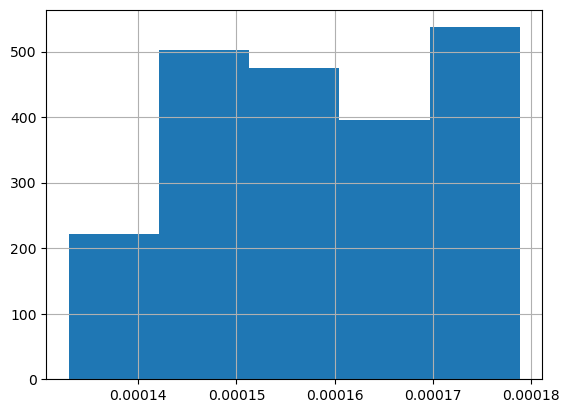

In [53]:
# Just to understand the dist. more
bins = pd.cut(data['NO2_column_number_density'], 5)
print(bins.value_counts(sort=False))
# Visually showing what it would mean to discretize the bins into categorical attributes
data['NO2_column_number_density'].hist(bins=5)

In [54]:
# Discretize the attributes using equal width method
data['NO2_column_number_density'] = pd.cut(x=data['NO2_column_number_density'], labels=["Very Low Polluted", "Low Polluted", "Medium Polluted", "High Polluted", "Very High Polluted"], bins=5)

print(data['NO2_column_number_density'].head(100))

0        Low Polluted
1     Medium Polluted
2     Medium Polluted
3     Medium Polluted
4     Medium Polluted
           ...       
95      High Polluted
96      High Polluted
97      High Polluted
98      High Polluted
99      High Polluted
Name: NO2_column_number_density, Length: 100, dtype: category
Categories (5, object): ['Very Low Polluted' < 'Low Polluted' < 'Medium Polluted' < 'High Polluted' < 'Very High Polluted']


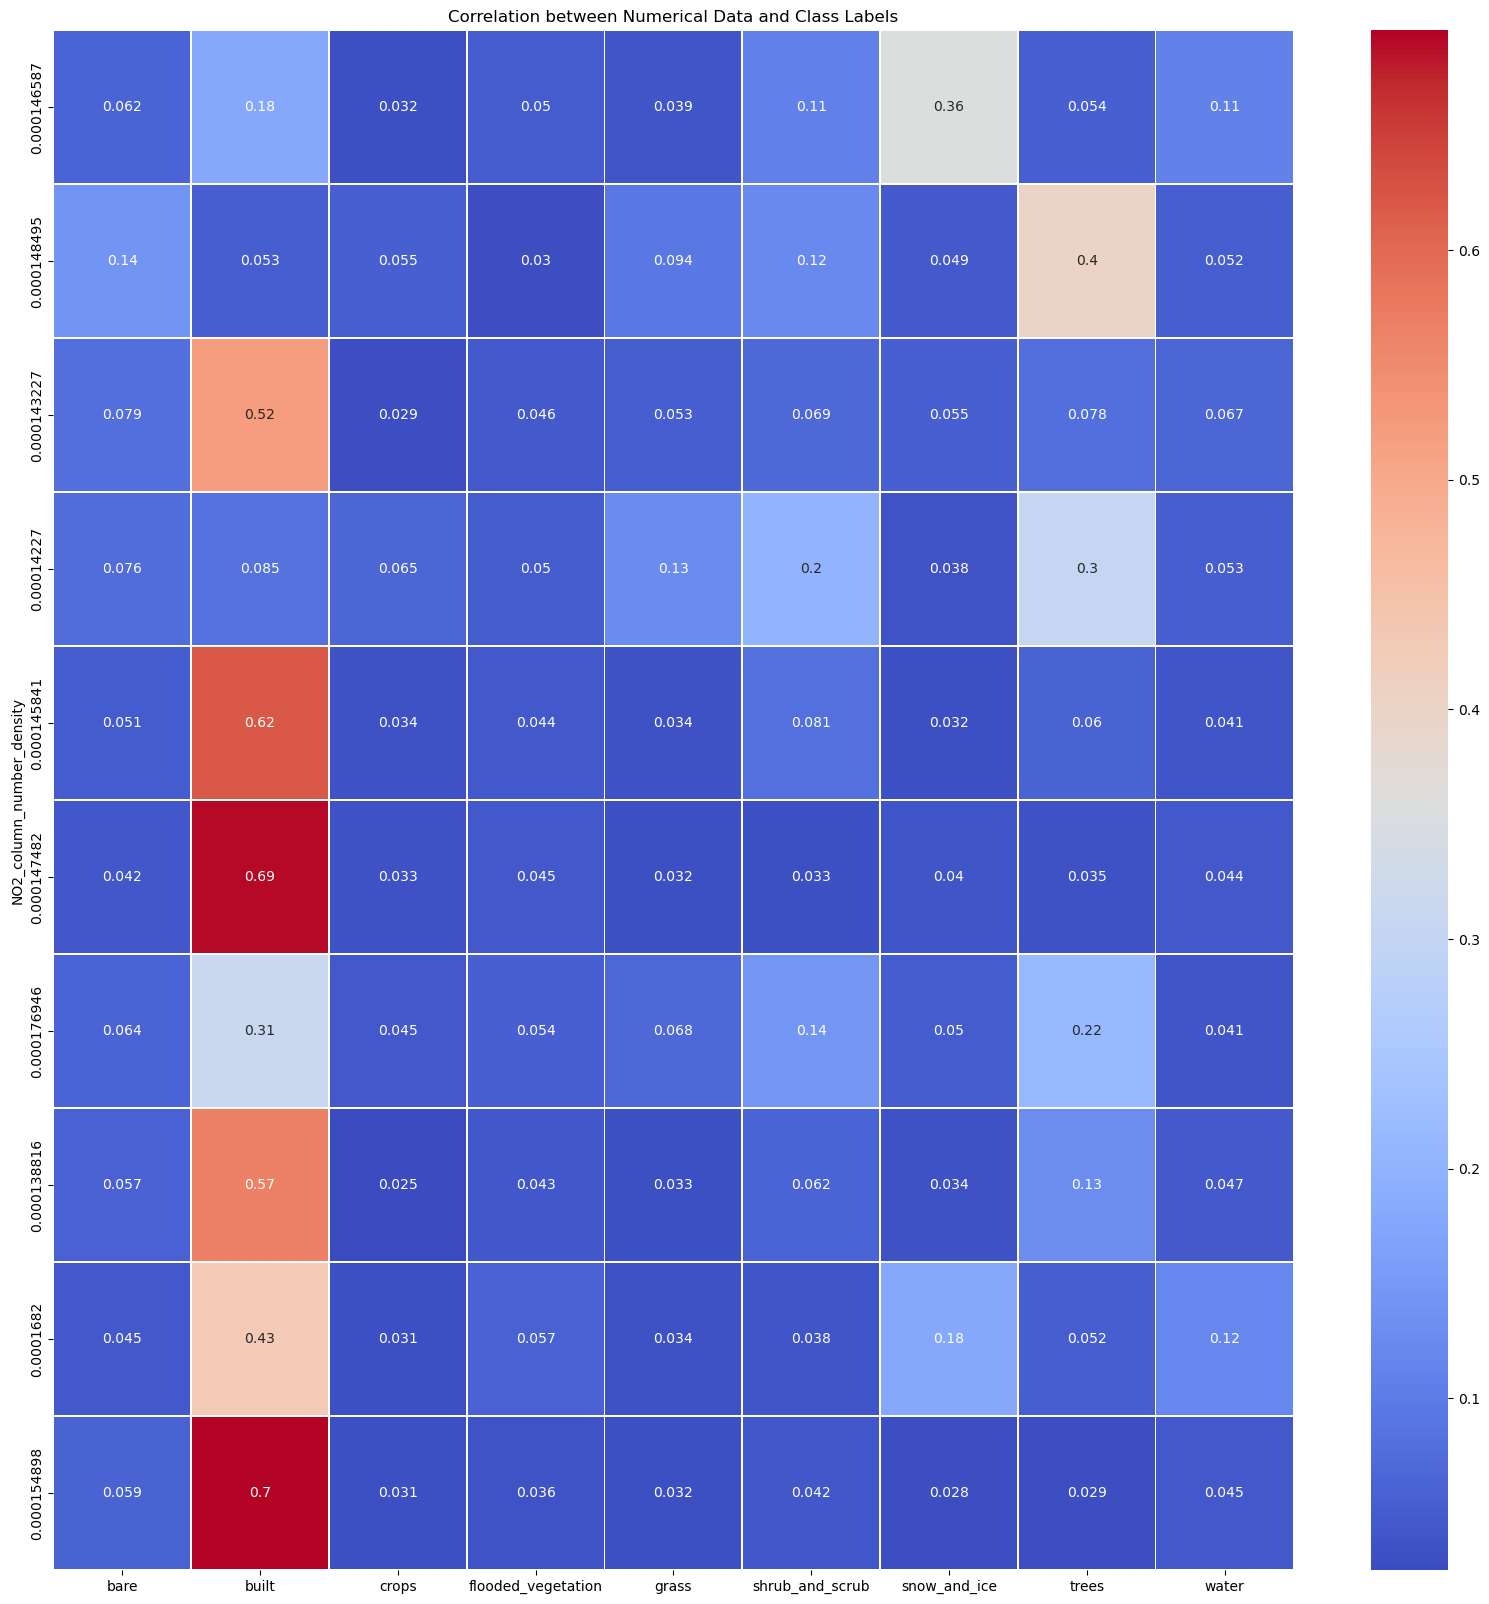

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

sample = data.sample(n=10) 

sample.set_index('NO2_column_number_density', inplace=True)

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(sample, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation between Numerical Data and Class Labels')
plt.show()


In [67]:
# Drop the target output from the input train set
X = data[data.columns.drop('NO2_column_number_density')]
print("Input Attributes: ", X)
# Set the target output to the output train set
y = data['NO2_column_number_density']
print("Training Labels: ", y)

Input Attributes:        bare  built  crops  flooded_vegetation  grass  shrub_and_scrub  \
0     0.13   0.03   0.06                0.10   0.03             0.12   
1     0.14   0.03   0.06                0.08   0.04             0.15   
2     0.17   0.05   0.06                0.05   0.05             0.15   
3     0.16   0.15   0.07                0.04   0.06             0.16   
4     0.10   0.31   0.06                0.04   0.06             0.14   
...    ...    ...    ...                 ...    ...              ...   
2126  0.08   0.44   0.03                0.04   0.04             0.08   
2127  0.09   0.52   0.03                0.03   0.03             0.07   
2128  0.07   0.53   0.03                0.04   0.04             0.07   
2129  0.06   0.61   0.03                0.05   0.03             0.05   
2130  0.06   0.69   0.03                0.03   0.03             0.03   

      snow_and_ice  trees  water  
0             0.04   0.42   0.07  
1             0.04   0.40   0.07  
2          

In [72]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, r2_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Based on the dist. of the histogram
# class_weights_custom = {"Extremely Low": 0.05, "Very Low": 0.80, "Low": 1, "Medium": .80, "High": 0.60, "Very High": 0.30, "Extremely High": 0.50}

# DTC
dtr = DecisionTreeRegressor(criterion='poisson', splitter='best', max_depth=10, min_samples_split=10, min_samples_leaf=5, max_features=None)

# Train the model
dtr.fit(X_train, y_train)

# Predictions on the test set
y_pred = dtr.predict(X_test)

# Eval
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [73]:
# print("Accuracy: ", accuracy)
# print(report)

print("MAE: ", mae)
print("r2: ", r2)

MAE:  1.102464576860723e-05
r2:  -0.2238121233521848


In [59]:
correlation_matrix = data.corr()
print("correlation_matrix: ", correlation_matrix)

correlation_matrix:                      bare  built  crops  flooded_vegetation  grass  \
bare                1.00  -0.45   0.20                0.06   0.12   
built              -0.45   1.00  -0.46               -0.26  -0.42   
crops               0.20  -0.46   1.00                0.26   0.45   
flooded_vegetation  0.06  -0.26   0.26                1.00   0.01   
grass               0.12  -0.42   0.45                0.01   1.00   
shrub_and_scrub     0.51  -0.79   0.39                0.30   0.46   
snow_and_ice        0.18  -0.18   0.16                0.07   0.04   
trees               0.08  -0.78   0.08                0.00   0.05   
water               0.05  -0.19   0.26                0.40  -0.07   

                    shrub_and_scrub  snow_and_ice  trees  water  
bare                           0.51          0.18   0.08   0.05  
built                         -0.79         -0.18  -0.78  -0.19  
crops                          0.39          0.16   0.08   0.26  
flooded_vegetation      

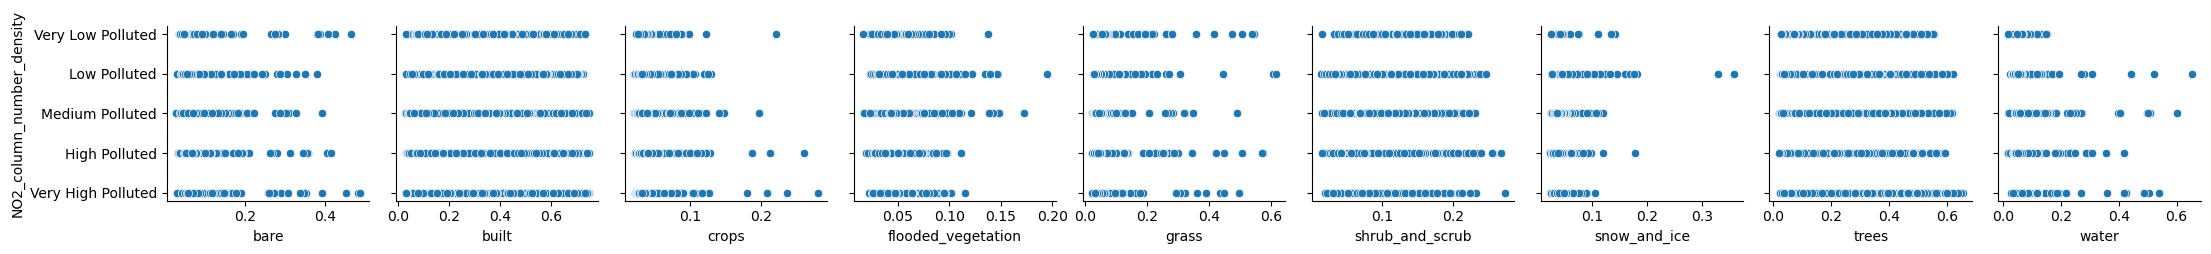

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Understanding the relationship between air quality attr. related to the LULC class labels
sns.pairplot(data, x_vars=['bare', 'built', 'crops', 'flooded_vegetation', 'grass', 'shrub_and_scrub', 'snow_and_ice', 'trees', 'water'], y_vars='NO2_column_number_density', kind='scatter')
plt.show()

In [61]:
# Drop the target output from the input train set
X = data[data.columns.drop('NO2_column_number_density')]
print("Input Attributes: ", X)
# Set the target output to the output train set
y = data['NO2_column_number_density']
print("Training Labels: ", y)

Input Attributes:        bare  built  crops  flooded_vegetation  grass  shrub_and_scrub  \
0     0.13   0.03   0.06                0.10   0.03             0.12   
1     0.14   0.03   0.06                0.08   0.04             0.15   
2     0.17   0.05   0.06                0.05   0.05             0.15   
3     0.16   0.15   0.07                0.04   0.06             0.16   
4     0.10   0.31   0.06                0.04   0.06             0.14   
...    ...    ...    ...                 ...    ...              ...   
2126  0.08   0.44   0.03                0.04   0.04             0.08   
2127  0.09   0.52   0.03                0.03   0.03             0.07   
2128  0.07   0.53   0.03                0.04   0.04             0.07   
2129  0.06   0.61   0.03                0.05   0.03             0.05   
2130  0.06   0.69   0.03                0.03   0.03             0.03   

      snow_and_ice  trees  water  
0             0.04   0.42   0.07  
1             0.04   0.40   0.07  
2          

In [62]:
# Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Based on the dist. of the histogram
# class_weights_custom = {"Extremely Low": 0.05, "Very Low": 0.80, "Low": 1, "Medium": .80, "High": 0.60, "Very High": 0.30, "Extremely High": 0.50}

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions for class labels
y_pred = rf_clf.predict(X_test)

# Eval
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [63]:
print("Accuracy: ", accuracy)
print(report)

Accuracy:  0.4098360655737705
                    precision    recall  f1-score   support

     High Polluted       0.38      0.28      0.33        74
      Low Polluted       0.40      0.48      0.43       103
   Medium Polluted       0.40      0.43      0.42        92
Very High Polluted       0.47      0.52      0.49       116
 Very Low Polluted       0.25      0.12      0.16        42

          accuracy                           0.41       427
         macro avg       0.38      0.37      0.37       427
      weighted avg       0.40      0.41      0.40       427



In [64]:
# Determining what attr. hold % of class labels
feature_importance = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

bare                 0.12
snow_and_ice         0.11
trees                0.11
water                0.11
crops                0.11
flooded_vegetation   0.11
shrub_and_scrub      0.11
grass                0.11
built                0.11
dtype: float64


In [19]:
!pip install lazypredict

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.3/1.3 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 99.8/99.8 MB 3.0 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [20]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [25:18<03:28, 69.64s/it]

[LightGBM] [Info] Number of positive: 24646, number of negative: 28952
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 53598, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.459831 -> initscore=-0.161025
[LightGBM] [Info] Start training from score -0.161025


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [25:19<00:00, 52.39s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             0.76               0.76    None      0.76   
NuSVC                              0.76               0.76    None      0.76   
ExtraTreesClassifier               0.76               0.76    None      0.76   
LGBMClassifier                     0.75               0.75    None      0.75   
SVC                                0.75               0.75    None      0.75   
KNeighborsClassifier               0.74               0.73    None      0.74   
BaggingClassifier                  0.74               0.73    None      0.73   
AdaBoostClassifier                 0.72               0.72    None      0.72   
DecisionTreeClassifier             0.68               0.68    None      0.68   
QuadraticDiscriminantAnalysis      0.67               0.67    None      0.67   
ExtraTreeClassifier                0.66 